# UMass Med DNA Hackathon
## Chosen Project: Mystalign


## Problems to be tackled
- User-friendy tools to analyze their data
- Sometimes they don't know how to formulate the questions they want to answer


In [17]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from Bio import SeqIO

dna_df = pd.read_csv('data/mystalign.txt', sep='\t', usecols=range(4), header=None)

In [18]:
dna_list = list(SeqIO.parse("data/c_elegans.PRJNA275000.WS260.genomic.fa", "fasta"))
record_dict = SeqIO.to_dict(SeqIO.parse("data/c_elegans.PRJNA275000.WS260.genomic.fa", "fasta"))

In [19]:
dna_df['seq'] = dna_df[0].map(lambda x : x.split(":")[0])
dna_df['count'] = dna_df[0].map(lambda x : x.split(":")[1])
dna_df

,0,1,2,3,seq,count
0,ATTCATCATTTGCCCCGCACAG:1,4,*,0,ATTCATCATTTGCCCCGCACAG,1
1,ACACAGATGCTCTATTGGATTCA:1,4,*,0,ACACAGATGCTCTATTGGATTCA,1
2,GCTGGTCAGAAGGCTCTTGGGT:1,4,*,0,GCTGGTCAGAAGGCTCTTGGGT,1
3,GTATATATATGTGCGCGAGAACA:1,4,*,0,GTATATATATGTGCGCGAGAACA,1
4,GCAGATTACTTGGAGTCAACCT:8,4,*,0,GCAGATTACTTGGAGTCAACCT,8
5,GACGAGTTGATTTAATGTAGNN:1,4,*,0,GACGAGTTGATTTAATGTAGNN,1
6,GTGGTTTTTATGTGGATCTGATTT:5,4,*,0,GTGGTTTTTATGTGGATCTGATTT,5
7,GTATATCTAGTTTGTCGTTTAATTCCCCTTGAAATTTTTTTGGGGG...,4,*,0,GTATATCTAGTTTGTCGTTTAATTCCCCTTGAAATTTTTTTGGGGG...,1
8,GCGCTTCTCGTAATCTCTTGATTTT:1,4,*,0,GCGCTTCTCGTAATCTCTTGATTTT,1
9,GAAAATGTATTGCGGATTGTTAT:2,4,*,0,GAAAATGTATTGCGGATTGTTAT,2


In [20]:
dna_df['seq']

0                                     ATTCATCATTTGCCCCGCACAG
1                                    ACACAGATGCTCTATTGGATTCA
2                                     GCTGGTCAGAAGGCTCTTGGGT
3                                    GTATATATATGTGCGCGAGAACA
4                                     GCAGATTACTTGGAGTCAACCT
5                                     GACGAGTTGATTTAATGTAGNN
6                                   GTGGTTTTTATGTGGATCTGATTT
7          GTATATCTAGTTTGTCGTTTAATTCCCCTTGAAATTTTTTTGGGGG...
8                                  GCGCTTCTCGTAATCTCTTGATTTT
9                                    GAAAATGTATTGCGGATTGTTAT
10                                     GTTGTCTTCAAGATGTTTGTT
11                                  ATCATTCATTTGGGAACTTGGTAA
12                                  GATGATCAAGACATTTTGTTTGAA
13                                    GTGGTGTTGTTATGATTATCAG
14                               CGACGATCGTTCTGGATGTTGTAAGCT
15                                        TACCTGATTGATTGAGCG
16                      

In [21]:
dna_test = dna_df[dna_df['seq'].str.contains('TCATTTGCC')]

In [22]:
def align(seq):
    maxSequence = ''
    foundList = []
    
    cutoff = 5
    post = seq[5:]
    term = seq[:5]

    # For the real dataset, will replace this with each chromosome
    full_dna = ''.join(record_dict['X'].seq[:10000])

    last_position = -1
    cont = True
    maxScore = -999
    while cont:
        last_position = full_dna.find(term, last_position+1)
        if last_position > 4:

            fragment = full_dna[last_position-5:last_position+len(post)]
            score = compare(seq,fragment)
            if score > maxScore:
                maxScore = score
                maxSequence = fragment
        else:
            cont = False
    return maxSequence+':'+ str(maxScore/float(len(seq)))
    
def compare(first, second):
    if len(first) != len(second):
        return -999
    score = 0
    for i in range(len(second)):
        if first[i] == second[i]:
            score +=1
        else:
            score -= 1
    return score


In [23]:
temp = dna_df.iloc[:1000]

In [24]:
temp['best'] = temp['seq'].map(align)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
temp[:10]

,0,1,2,3,seq,count,best
0,ATTCATCATTTGCCCCGCACAG:1,4,*,0,ATTCATCATTTGCCCCGCACAG,1,TTTGAATTCAGCTCGCCGAGAG:-0.272727272727
1,ACACAGATGCTCTATTGGATTCA:1,4,*,0,ACACAGATGCTCTATTGGATTCA,1,AAACAACACAATCATTTAAAAAT:-0.304347826087
2,GCTGGTCAGAAGGCTCTTGGGT:1,4,*,0,GCTGGTCAGAAGGCTCTTGGGT,1,TGAACGCTGGAAATGTGTCTGT:-0.454545454545
3,GTATATATATGTGCGCGAGAACA:1,4,*,0,GTATATATATGTGCGCGAGAACA,1,AAAAAGTATAGTAATAGTTAAGT:-0.391304347826
4,GCAGATTACTTGGAGTCAACCT:8,4,*,0,GCAGATTACTTGGAGTCAACCT,8,AGAATGCAGAAAAATGCAATGT:-0.363636363636
5,GACGAGTTGATTTAATGTAGNN:1,4,*,0,GACGAGTTGATTTAATGTAGNN,1,GCCAAGACGAAAAAATACAGTA:0.0
6,GTGGTTTTTATGTGGATCTGATTT:5,4,*,0,GTGGTTTTTATGTGGATCTGATTT,5,AGTGTGTGGTTACAATGCAGTTAA:-0.416666666667
7,GTATATCTAGTTTGTCGTTTAATTCCCCTTGAAATTTTTTTGGGGG...,4,*,0,GTATATCTAGTTTGTCGTTTAATTCCCCTTGAAATTTTTTTGGGGG...,1,CATCCGTATATTTTTAGCAATTGAGAGCTCAAATTATTCAGCCTTT...
8,GCGCTTCTCGTAATCTCTTGATTTT:1,4,*,0,GCGCTTCTCGTAATCTCTTGATTTT,1,:-39.96
9,GAAAATGTATTGCGGATTGTTAT:2,4,*,0,GAAAATGTATTGCGGATTGTTAT,2,CAGGAGAAAATTCCGATTTTCTA:-0.130434782609


In [26]:
temp['fragment'] = temp['best'].map(lambda x : x.split(":")[0])
temp['score'] = temp['best'].map(lambda x : x.split(":")[1])
temp['score'] = pd.to_numeric(temp['score'])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

In [27]:
temp['fragment']

0                                 TTTGAATTCAGCTCGCCGAGAG
1                                AAACAACACAATCATTTAAAAAT
2                                 TGAACGCTGGAAATGTGTCTGT
3                                AAAAAGTATAGTAATAGTTAAGT
4                                 AGAATGCAGAAAAATGCAATGT
5                                 GCCAAGACGAAAAAATACAGTA
6                               AGTGTGTGGTTACAATGCAGTTAA
7      CATCCGTATATTTTTAGCAATTGAGAGCTCAAATTATTCAGCCTTT...
8                                                       
9                                CAGGAGAAAATTCCGATTTTCTA
10                                 GTATGGTTGTTTAGCTACAGT
11                              TTCAGATCATCGAGAGCTTTCATT
12                              TTGTTGATGAAGTTTTTGTGAAGT
13                                CGTATGTGGTATTTTGTAATAG
14                           TTTGACGACGTTCAGAGCTCGGAAAAT
15                                    GTACTTACCTTTCAAGTG
16                                        ATTCATGTGAATTT
17                             

In [28]:
scoresTemp = list(temp[temp['score']>0]['score'].sort_values(ascending = False))

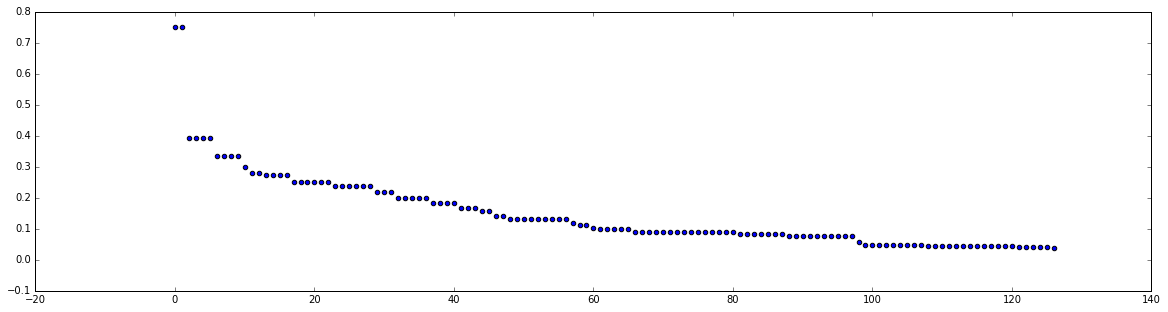

In [29]:
plt.rcParams['figure.figsize'] = 20, 5
plt.scatter(range(len(scoresTemp)), scoresTemp)

In [30]:
len(record_dict['X'].seq)

17537347

In [31]:
dna_concat = ""
for sequence in dna_list:
    dna_concat += sequence.seq
print len(dna_concat)

98291416


In [32]:
print record_dict['X'].seq[:100000].find('GCGCT')

26815


## Challenges

### Challenges: Scale

- Misaligned fragments file: ~1M records
- Chromosome: ~98M bp

### Domain

A better understanding of current best practices in bioinformatics would have improved the process. A lot of time was spent hand-coding a solution.

- Current Algorithms
  - BLAST
  - Bowtie
  - Biopython

### Challenges: Time

For a problem like this, an iterative approach would have helped improve both the process and the solution. Much of day 1 was spent parsing the problem vs coding a solution. Although we didn't get to a final solution that could be implemented at scale, we still had fun and we learned a lot!

## Intended Implementation

We originally wanted to write a score function to determine where missing DNA fragments originated from. It would take as input a list of unidentifiable fragments and the chromosomes they originated from. The function would then output any fragments with an alignment score greater than or equal to 70% as well as their locus on the chromosome. Unfortunately, we were unable to scale our solution to deal with larger file sizes.